In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 載入數據
data = pd.read_csv("/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv")

# 查看數據的前5行
print(data.head())

# 查看數據的基本信息
print(data.info())

# 描述數值型數據的統計摘要
print(data.describe())

       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy

In [2]:
# 檢查是否有缺失值
print(data.isnull().sum())

# 移除明顯異常的數據，例如 PM2.5 或 Carbon Monoxide 為負值
data = data[data['air_quality_PM2.5'] > 0]
data = data[data['air_quality_Carbon_Monoxide'] > 0]

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

country
Saudi Arabien           45.000000
Marrocos                40.300000
Turkménistan            37.800000
Saudi Arabia            35.273222
Kuwait                  34.885892
Qatar                   34.495417
Iraq                    34.345228
Турция                  34.000000
United Arab Emirates    33.421162
Djibouti                33.370711
Name: temperature_celsius, dtype: float64


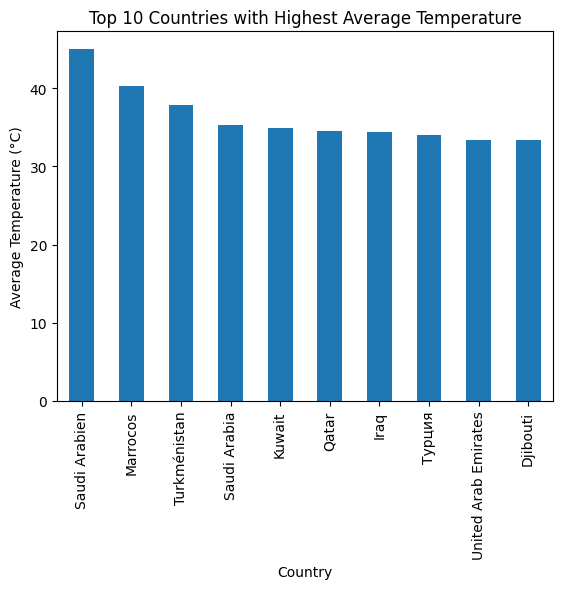

In [3]:
# 按國家分組計算平均溫度
avg_temp_by_country = data.groupby('country')['temperature_celsius'].mean().sort_values(ascending=False)

# 顯示溫度最高的國家
print(avg_temp_by_country.head(10))

# 可視化
avg_temp_by_country.head(10).plot(kind='bar', title='Top 10 Countries with Highest Average Temperature')
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.show()

country
Chile           299.949013
China           143.548146
India           102.915753
Saudi Arabia     92.764895
Indonesia        92.609596
Kuwait           73.768485
Bangladesh       70.760396
Malaysia         70.699959
Südkorea         70.200000
Bahrain          60.399730
Name: air_quality_PM2.5, dtype: float64


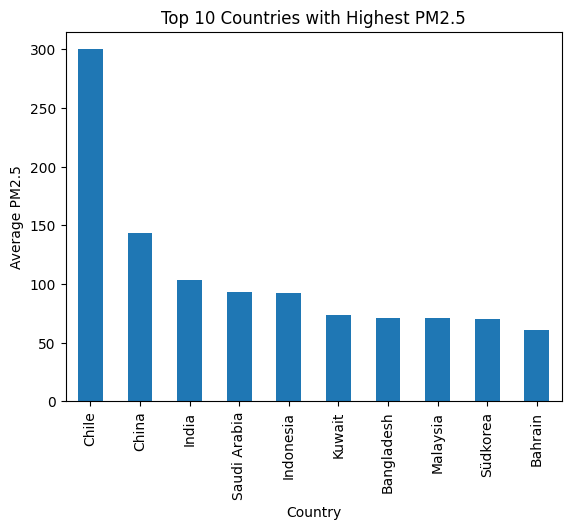

In [4]:
# 按國家分組計算平均 PM2.5
avg_pm25_by_country = data.groupby('country')['air_quality_PM2.5'].mean().sort_values(ascending=False)

# 顯示 PM2.5 最高的國家
print(avg_pm25_by_country.head(10))

# 可視化
avg_pm25_by_country.head(10).plot(kind='bar', title='Top 10 Countries with Highest PM2.5')
plt.xlabel('Country')
plt.ylabel('Average PM2.5')
plt.show()

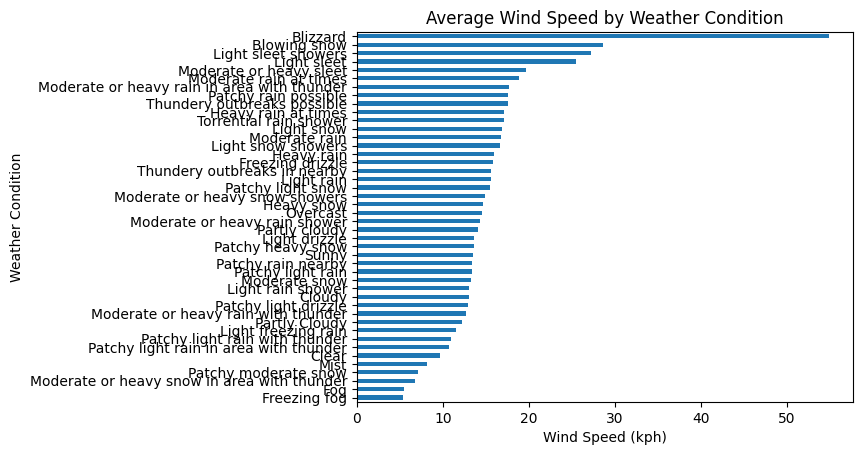

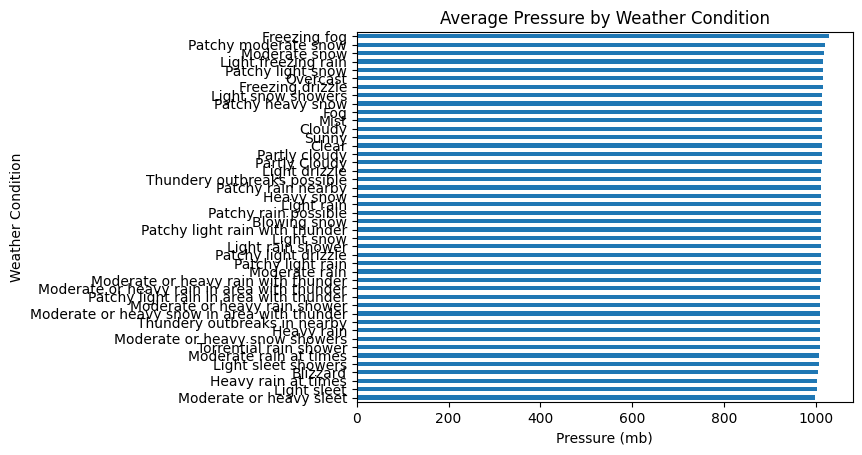

In [5]:
# 查看不同天氣條件的平均風速與氣壓
weather_conditions = data.groupby('condition_text')[['wind_kph', 'pressure_mb']].mean()

# 可視化風速
weather_conditions['wind_kph'].sort_values().plot(kind='barh', title='Average Wind Speed by Weather Condition')
plt.xlabel('Wind Speed (kph)')
plt.ylabel('Weather Condition')
plt.show()

# 可視化氣壓
weather_conditions['pressure_mb'].sort_values().plot(kind='barh', title='Average Pressure by Weather Condition')
plt.xlabel('Pressure (mb)')
plt.ylabel('Weather Condition')
plt.show()